In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  
import numpy as np       
import pandas as pd         
from sklearn.metrics import accuracy_score

In [14]:
dataset=pd.read_csv("heart.csv")     

In [15]:
dataset.head()     

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
features = dataset.drop(["output"], axis=1)    
X = np.array(features)            
y = np.array(dataset["output"])     

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.20)    # DIVISION A DATOS DE ENTRENAMIENTO  DE MANERA QUE SE ENTRENA EL ARBOL DE DECISION Y DESPUES SE UTILIZA PARA EVALUARLO SI FUE EXITOSO

In [17]:
tree = DecisionTreeClassifier()   

In [19]:
tree.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
tree.tree_.max_depth    

9

In [21]:
validation_prediction = tree.predict(X_val)    
training_prediction = tree.predict(X_train)     

In [22]:
print('Exactitud training data: ', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Exactitud validation data: ', accuracy_score(y_true=y_val, y_pred=validation_prediction))

Exactitud training data:  1.0
Exactitud validation data:  0.7704918032786885


In [23]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [24]:
!pip install graphviz

In [25]:
import graphviz 
from sklearn.tree import export_graphviz

In [26]:
feature_names = features.columns

In [27]:
dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=feature_names,  
                         class_names=True,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)

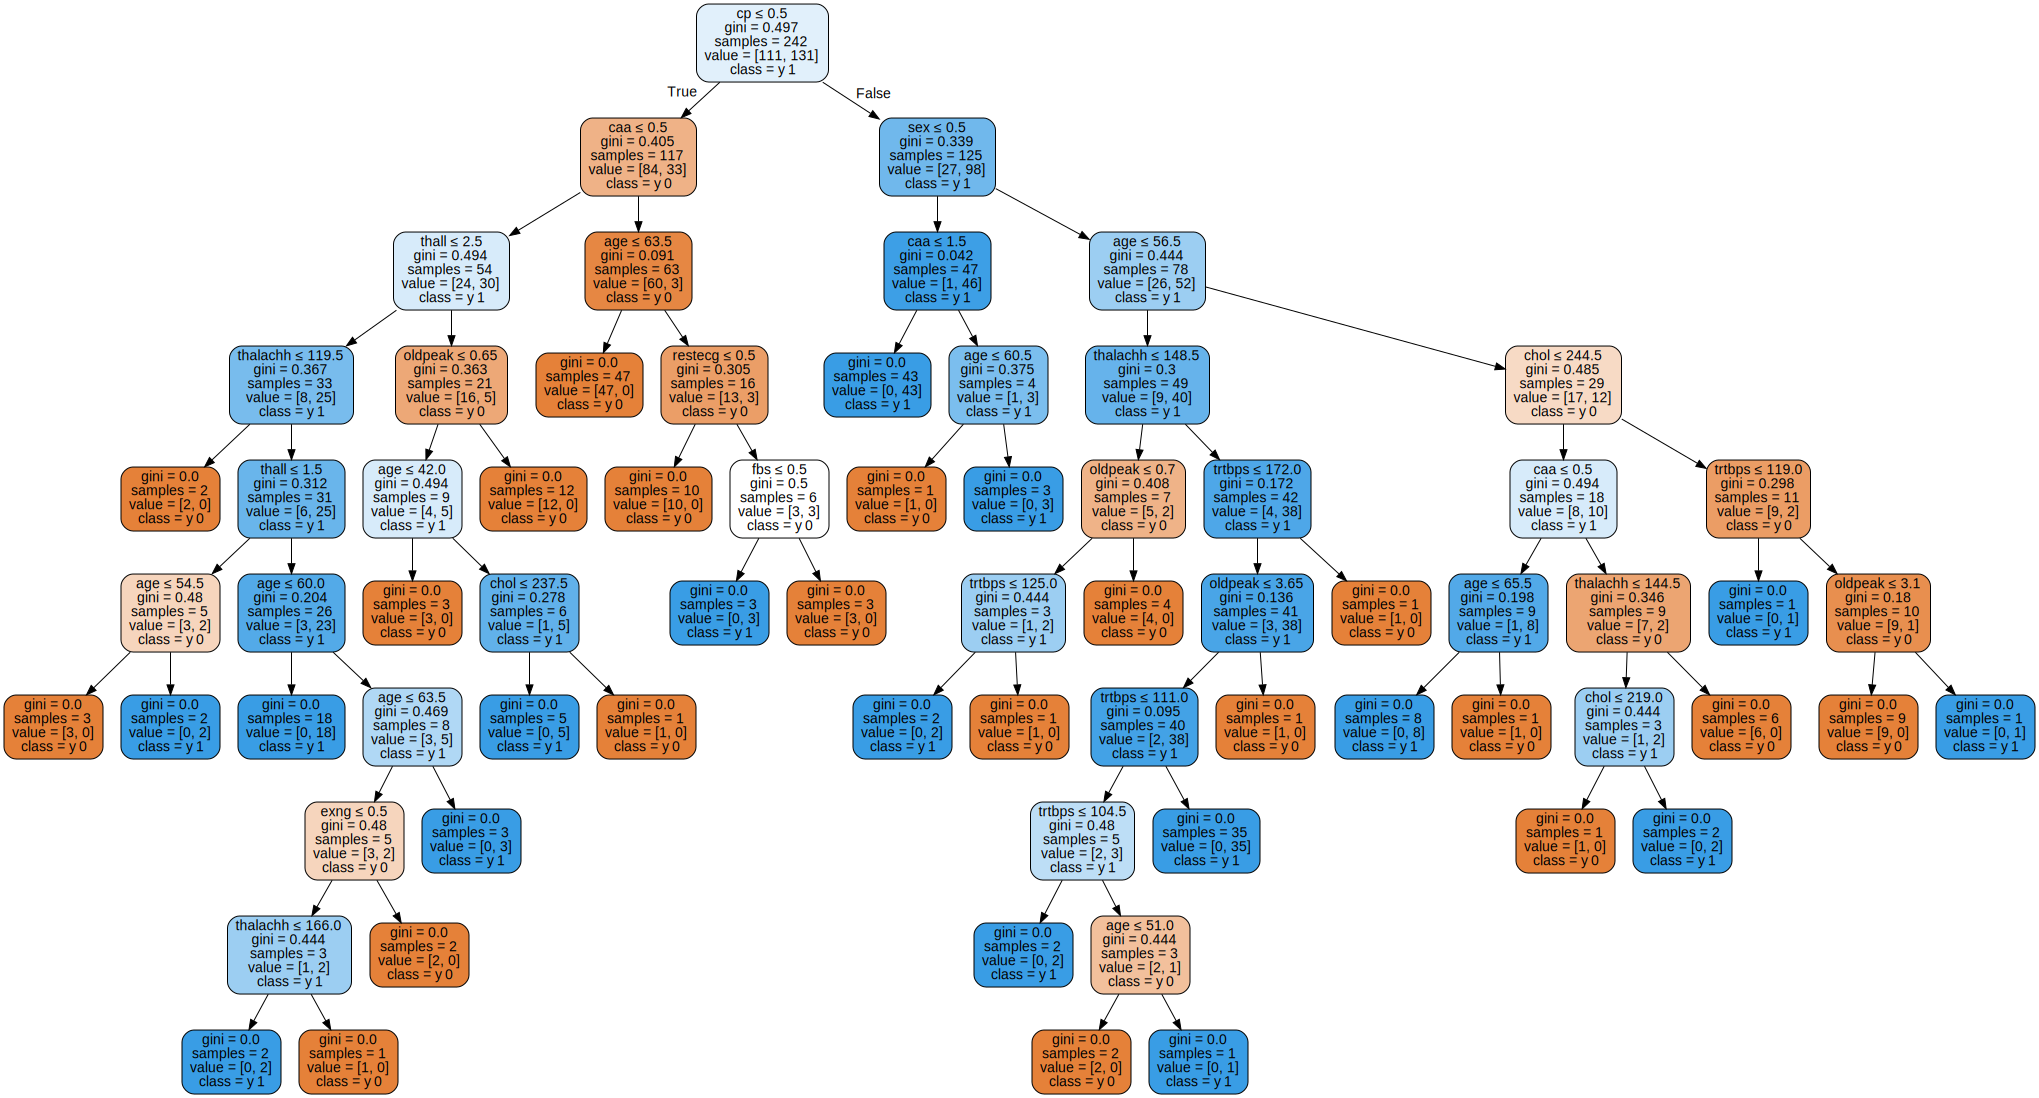

In [28]:
graph

###Segundo modelo 

In [29]:
tree = DecisionTreeClassifier(min_samples_leaf=10, max_depth=6, min_samples_split=50)   #modificacion de max depth

In [30]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
validation_prediction = tree.predict(X_val)
training_prediction = tree.predict(X_train)

In [34]:
print('Exactitud training data: ', accuracy_score(y_true=y_train, y_pred=training_prediction))
print('Exactitud validation data: ', accuracy_score(y_true=y_val, y_pred=validation_prediction))

Exactitud training data:  0.8429752066115702
Exactitud validation data:  0.819672131147541


In [35]:
dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=feature_names,  
                         class_names=True,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)

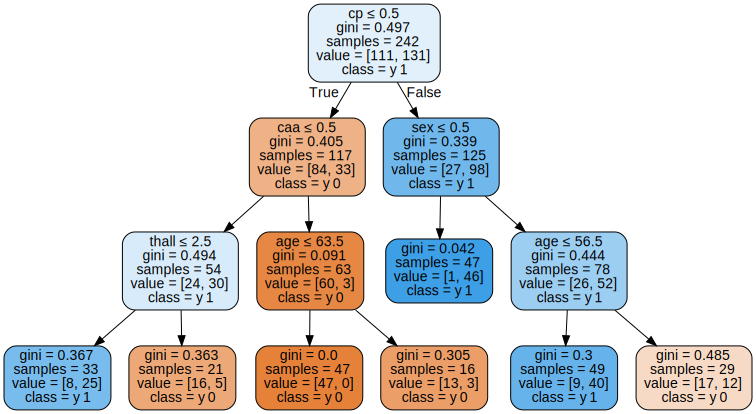

In [36]:
graph
